In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [38]:
# read the csv file
df2 = pd.read_csv("https://raw.githubusercontent.com/mayurasandakalum/car-price-prediction-project/master/model/train.csv")
df2.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [17]:
# display the shape of the data
df1.shape

(19237, 18)

In [18]:
df1.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [20]:
# remove ID column
df2 = df1.drop(['ID'], axis='columns')
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [21]:
# replace "-" with 0
df2.replace('-', 0, inplace=True)
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [36]:
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [24]:
# Display details of dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [39]:
df2['Mileage'] = df2['Mileage'].str.replace('km','').astype('float64')

In [40]:
df2['Engine volume'] = df2['Engine volume'].str.replace('Turbo','').astype('float64')

In [41]:
df2

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
df2.corr()['Price']

<ipython-input-42-1fbd15721134>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['Price']


ID              -0.000844
Price            1.000000
Prod. year       0.012982
Engine volume    0.008753
Mileage         -0.001758
Cylinders        0.007518
Airbags         -0.012824
Name: Price, dtype: float64

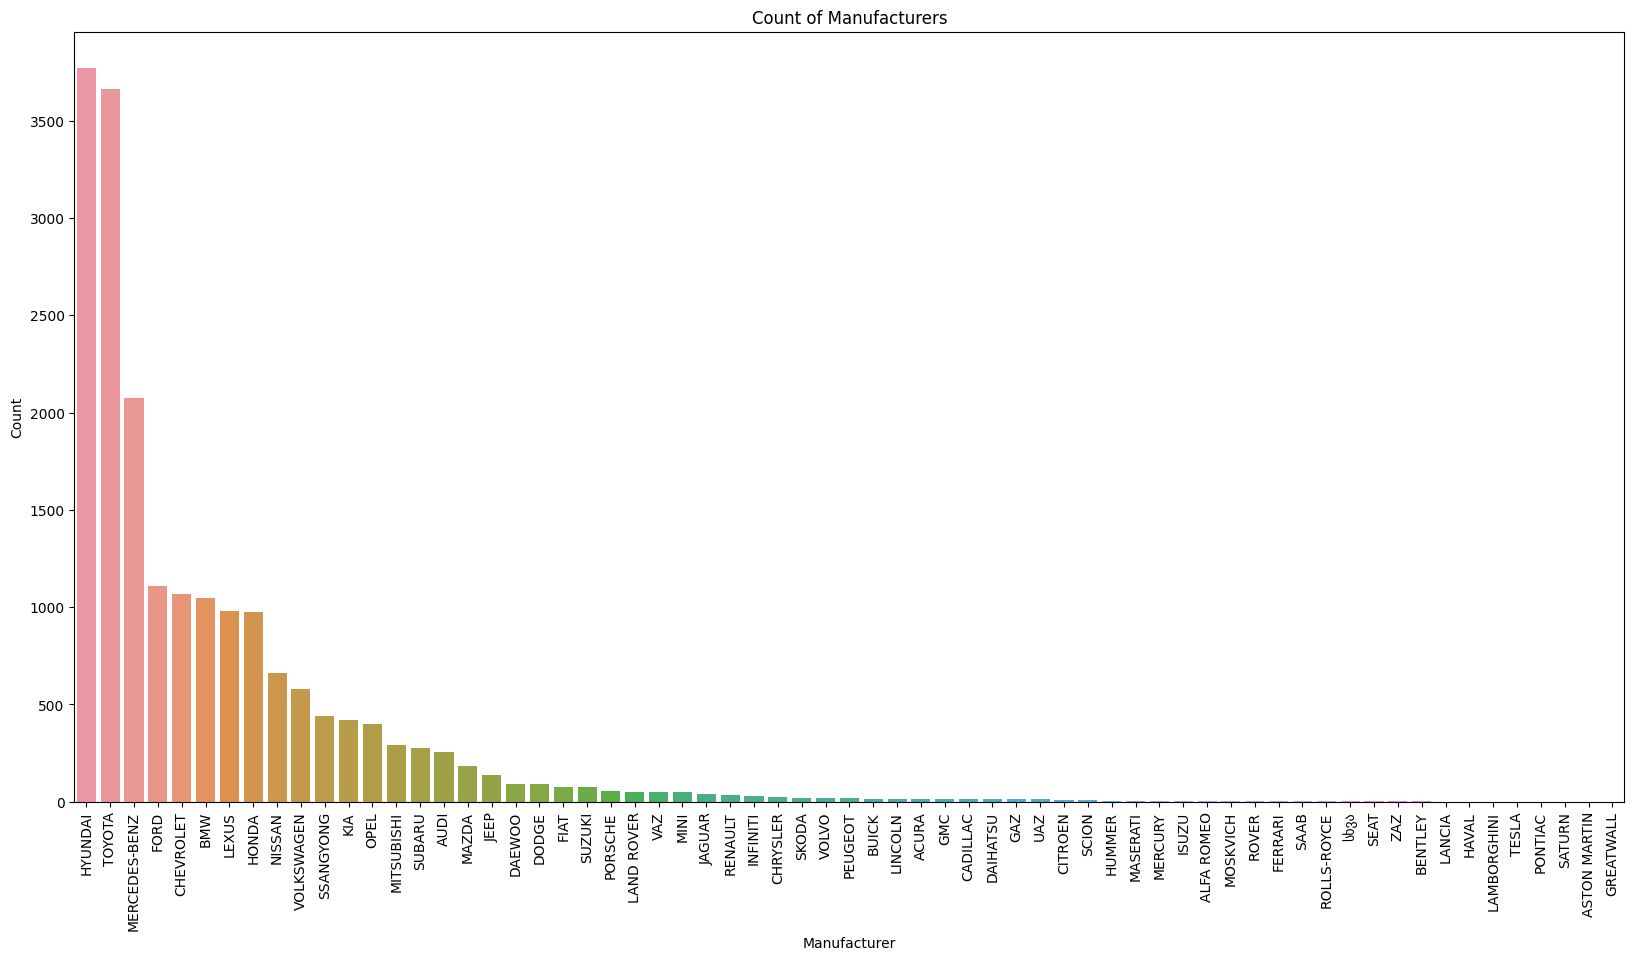

In [11]:
# df1.groupby('Manufacturer')['Manufacturer'].agg('count').plot.bar()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame

# Group by 'Manufacturer' and count the occurrences
manufacturer_counts = df2['Manufacturer'].value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Count of Manufacturers')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [12]:
def count_the_cars (arr):
    tot = 0
    for i in arr.values:
        tot += i
    return tot

manufactures_counts = df2.groupby('Manufacturer')['Manufacturer'].agg('count')
manufactures_counts_filtered = manufactures_counts[manufactures_counts > 10]

print(manufactures_counts.size)
print(manufactures_counts_filtered.size)


print("before:", count_the_cars(manufactures_counts))
print("after:", count_the_cars(manufactures_counts_filtered))

65
41
before: 19237
after: 19171


In [13]:
df2['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [14]:
# sort the dataframe by Manufacturer
df3 = df2.sort_values(by='Manufacturer')
df3.reset_index(drop=True, inplace=True)
df3

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,4861,ACURA,MDX,2011,Jeep,Yes,Petrol,3.7,181970 km,6.0,Automatic,4x4,04-May,Left wheel,Brown,12
1,4391,ACURA,RDX,2014,Jeep,Yes,Petrol,3.5,0 km,6.0,Automatic,Front,04-May,Left wheel,White,12
2,2979,ACURA,TSX,2010,Sedan,Yes,Petrol,2.4,203061 km,4.0,Automatic,Front,04-May,Left wheel,Blue,12
3,69,ACURA,TL saber,2001,Sedan,No,Petrol,2.5,205502 km,6.0,Tiptronic,Front,04-May,Right-hand drive,Black,4
4,3450,ACURA,TLX,2015,Sedan,Yes,Petrol,2.4,83099 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,24148,VOLVO,XC90,2010,Jeep,Yes,Petrol,3.2,124000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,9
19233,2000,ZAZ,969 968m,1989,Coupe,No,Petrol,0.8,201000 km,3.0,Manual,Front,02-Mar,Left wheel,Blue,0
19234,5645,ZAZ,969 luaz,1990,Jeep,Yes,Petrol,0.9,64525 km,4.0,Manual,4x4,02-Mar,Left wheel,Green,0
19235,9408,სხვა,GONOW,2005,Jeep,Yes,Petrol,2.3,102000 km,4.0,Manual,Rear,04-May,Left wheel,Silver,2


In [34]:
df2.to_csv('out.csv', index=False)